# 소프트맥스 (Softmax)

### 개념 요약
소프트맥스(Softmax)는 모델이 출력한 여러 개의 숫자 값(점수 또는 로짓, Logits)을 확률 분포로 변환하는 활성화 함수임. 다중 클래스 분류(Multi-class Classification) 문제에서 특정 입력이 각 클래스에 속할 상대적인 확률을 계산하기 위해 모델의 마지막 계층에서 주로 사용됨.

결과적으로 출력된 모든 확률 값의 총합은 1이 되며, 각 값은 0과 1 사이의 수치로 나타남. 이를 통해 모델의 예측을 가장 확률이 높은 클래스로 결정하거나, 크로스 엔트로피 같은 손실 함수에 입력값으로 사용할 수 있음.

### 수학적 배경
소프트맥스 함수는 입력 벡터 $z$의 각 요소 $z_i$에 대해 지수 함수를 적용하고, 그 결과를 모든 요소의 지수 함수 값의 총합으로 나누어 정규화함. $K$는 전체 클래스의 개수임.

$$ \text{softmax}(z_i) = \frac{e^{z_i}}{\sum_{j=1}^{K} e^{z_j}} $$

지수 함수($e^x$)를 사용하는 이유는 입력값의 차이를 증폭시키면서 모든 값을 양수로 만들기 위함임. 가장 큰 입력값이 변환 후에도 가장 큰 확률 값을 갖도록 보장함.

### 라이브러리 임포트 (Setup)

In [1]:
# !pip install numpy matplotlib

import numpy as np
import matplotlib.pyplot as plt

### 예제 데이터 준비 (Data Preparation)
분류 모델이 3개의 클래스('개', '고양이', '새')에 대해 출력한 가상의 점수(로짓)를 준비함. 이 점수는 모델이 각 클래스에 대해 얼마나 확신하는지를 나타내는 원시(raw) 값임.

In [2]:
# 모델이 출력한 원시 점수 (Logits)
logits = np.array([2.0, 1.0, 0.1])
class_names = ['Dog', 'Cat', 'Bird']

print(f"클래스: {class_names}")
print(f"모델 출력 점수 (Logits): {logits}")

클래스: ['Dog', 'Cat', 'Bird']
모델 출력 점수 (Logits): [2.  1.  0.1]


### 핵심 로직 구현 (Code Implementation)
NumPy를 사용하여 소프트맥스 함수를 직접 구현함. 수치적으로 안정적인 계산을 위해 입력값에서 최댓값을 빼주는 기법을 적용함. 이 기법은 결과값에 영향을 주지 않으면서 `exp` 계산 시 발생할 수 있는 오버플로우를 방지함.

In [3]:
def softmax(logits):
    """
    소프트맥스 함수를 계산함.

    Args:
      logits: 모델이 출력한 원시 점수 벡터
    
    Returns:
      각 클래스에 대한 확률 벡터
    """
    # 수치 안정성을 위한 최댓값 차감
    stable_logits = logits - np.max(logits)
    
    # 각 요소에 지수 함수 적용
    exp_logits = np.exp(stable_logits)
    
    # 지수 함수의 총합으로 나누어 정규화
    probabilities = exp_logits / np.sum(exp_logits)
    
    return probabilities

### 결과 확인 및 시각화 (Results & Visualization)
준비된 로짓 데이터에 소프트맥스 함수를 적용하여 확률 분포를 계산하고, 그 합계가 1이 되는지 확인하여 정규화가 잘 이루어졌는지 검증함.

In [4]:
# 소프트맥스 함수를 통해 확률 계산
probabilities = softmax(logits)

print(f"변환된 확률: {probabilities}")
print(f"확률의 총합: {np.sum(probabilities):.4f}")

for name, prob in zip(class_names, probabilities):
    print(f"{name}일 확률: {prob:.2%}")

변환된 확률: [0.65900114 0.24243297 0.09856589]
확률의 총합: 1.0000
Dog일 확률: 65.90%
Cat일 확률: 24.24%
Bird일 확률: 9.86%


입력 점수와 출력 확률을 막대그래프로 시각화하여 소프트맥스가 값의 대소 관계는 유지하면서 어떻게 상대적인 비율(확률)로 변환하는지 직관적으로 비교함.

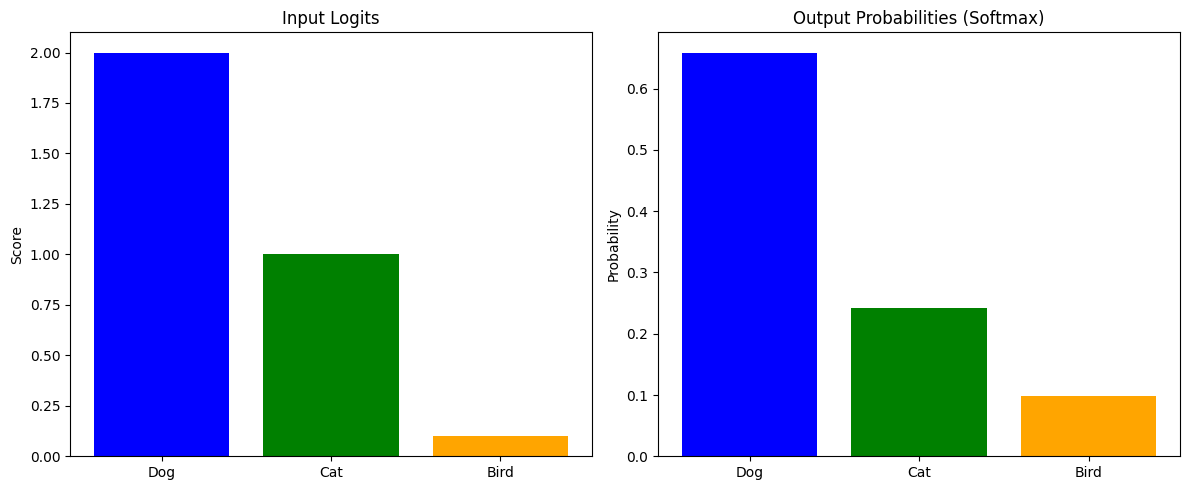

In [5]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.bar(class_names, logits, color=['blue', 'green', 'orange'])
ax1.set_title('Input Logits')
ax1.set_ylabel('Score')

ax2.bar(class_names, probabilities, color=['blue', 'green', 'orange'])
ax2.set_title('Output Probabilities (Softmax)')
ax2.set_ylabel('Probability')

plt.tight_layout()
plt.show()

### 고려사항 (Considerations)
* **수치적 안정성(Numerical Stability)**: 입력 점수(로짓)가 매우 크거나 작은 경우, 지수 함수($e^x$)의 결과가 너무 커지거나(오버플로우) 작아져(언더플로우) 계산이 불안정해질 수 있음. 코드 구현 시 입력값에서 최댓값을 빼주는 방법을 사용하여 이를 방지하는 것이 일반적임.
* **크로스 엔트로피와의 결합**: 소프트맥스는 분류 문제에서 크로스 엔트로피 손실 함수와 거의 항상 함께 사용됨. 소프트맥스로 예측 확률을 구하고, 크로스 엔트로피로 실제 정답과의 오차를 계산하는 방식은 모델 학습에 매우 효율적임.

### 최종 요약 (Conclusion)
소프트맥스는 다중 클래스 분류 모델의 최종 출력값을 해석 가능한 '확률'로 변환하는 필수적인 함수임. 모델의 원시 점수를 각 클래스에 대한 신뢰도로 변환하여, 가장 가능성이 높은 클래스를 선택할 수 있게 함.

예제를 통해, 소프트맥스가 입력 점수 간의 상대적 크기를 보존하면서 총합이 1인 확률 분포로 정규화하는 과정을 확인함. 이는 모델의 예측을 명확하게 하고, 후속 손실 계산 단계의 기반을 마련하는 중요한 역할을 함.